# COVID19 California Data + Facebook Prophet





In [1]:
import pandas as pd
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/ca_train.csv')
df.head()

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
0   1     California             US  ...  2020-01-22             0.0        0.0
1   2     California             US  ...  2020-01-23             0.0        0.0
2   3     California             US  ...  2020-01-24             0.0        0.0
3   4     California             US  ...  2020-01-25             0.0        0.0
4   5     California             US  ...  2020-01-26             0.0        0.0

[5 rows x 8 columns]

## STEP 1: Split into DS & Y
### STEP 1A: We're starting with `ConfirmedCases` as Y

In [0]:
sm = df[['Date', 'ConfirmedCases']]
sm.columns = ['ds','y']

In [7]:
m = Prophet()
m.fit(sm)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
417 2021-03-14
418 2021-03-15
419 2021-03-16
420 2021-03-17
421 2021-03-18

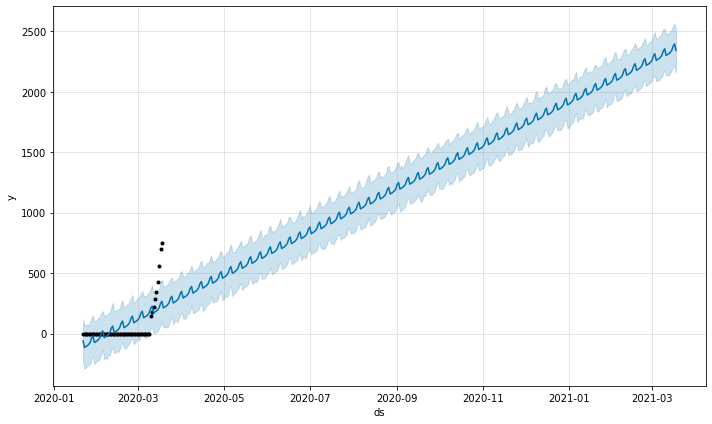

In [17]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

### * NOTE: Wow that is ridiculously unhelpful. Clearly 365 was too much. Turning it into a function for more rapid testing

# OUR FUNCTION

In [0]:
def get_prof_preds_for(df, n):
  m = Prophet()
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  fig1 = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


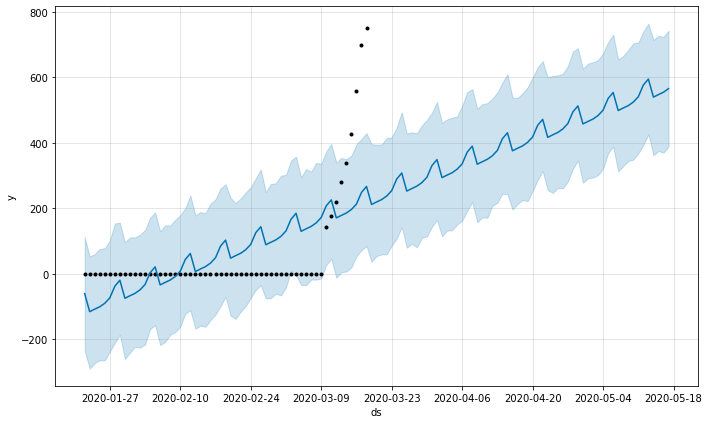

In [19]:
get_prof_preds_for(sm, 60)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


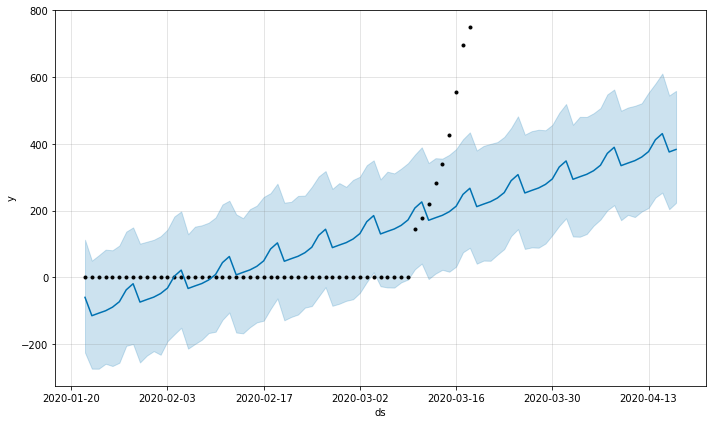

In [20]:
get_prof_preds_for(sm, 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


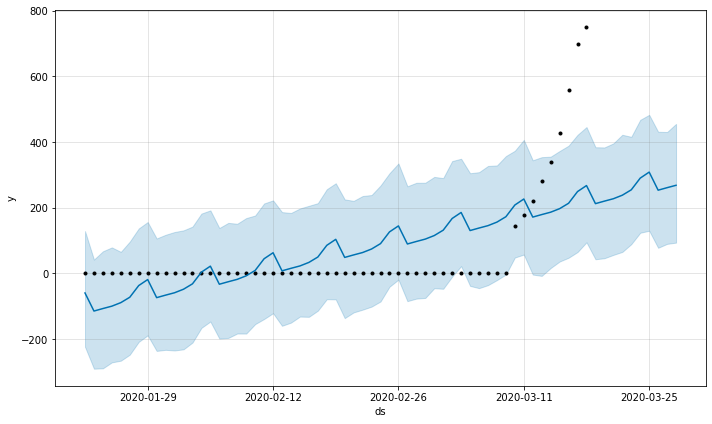

In [21]:
get_prof_preds_for(sm, 10)

#### Trimming the training data

In [50]:
sm

ds      y
0   2020-01-22    0.0
1   2020-01-23    0.0
2   2020-01-24    0.0
3   2020-01-25    0.0
4   2020-01-26    0.0
5   2020-01-27    0.0
6   2020-01-28    0.0
7   2020-01-29    0.0
8   2020-01-30    0.0
9   2020-01-31    0.0
10  2020-02-01    0.0
11  2020-02-02    0.0
12  2020-02-03    0.0
13  2020-02-04    0.0
14  2020-02-05    0.0
15  2020-02-06    0.0
16  2020-02-07    0.0
17  2020-02-08    0.0
18  2020-02-09    0.0
19  2020-02-10    0.0
20  2020-02-11    0.0
21  2020-02-12    0.0
22  2020-02-13    0.0
23  2020-02-14    0.0
24  2020-02-15    0.0
25  2020-02-16    0.0
26  2020-02-17    0.0
27  2020-02-18    0.0
28  2020-02-19    0.0
29  2020-02-20    0.0
30  2020-02-21    0.0
31  2020-02-22    0.0
32  2020-02-23    0.0
33  2020-02-24    0.0
34  2020-02-25    0.0
35  2020-02-26    0.0
36  2020-02-27    0.0
37  2020-02-28    0.0
38  2020-02-29    0.0
39  2020-03-01    0.0
40  2020-03-02    0.0
41  2020-03-03    0.0
42  2020-03-04    0.0
43  2020-03-05    0.0
44  2020-03-06    0.0
45  2020-03-07    0.0
46  2020-03-08    0.0
47  2020-03-09    0.0
48  2020-03-10  144.0
49  2020-03-11  177.0
50  2020-03-12  221.0
51  2020-03-13  282.0
52  2020-03-14  340.0
53  2020-03-15  426.0
54  2020-03-16  557.0
55  2020-03-17  698.0
56  2020-03-18  751.0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


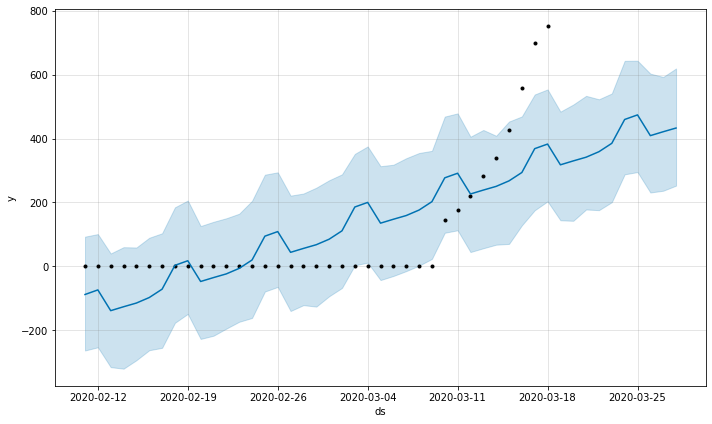

In [25]:
get_prof_preds_for(sm[20:],10)

In [0]:
def get_prof_preds_for(df, n):
  m = Prophet(daily_seasonality=True)
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  fig1 = m.plot(forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


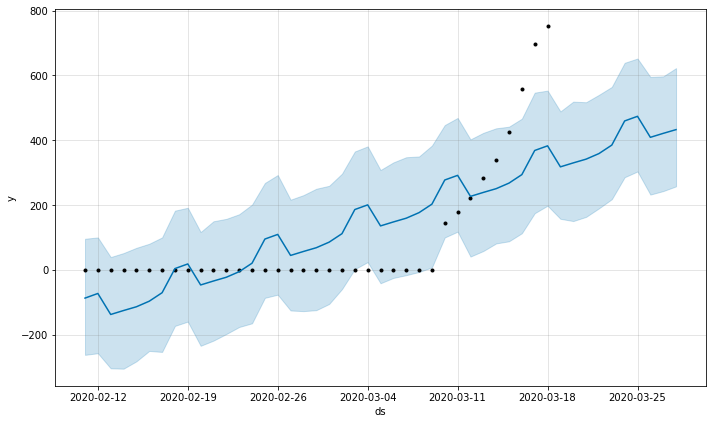

In [30]:
get_prof_preds_for(sm[20:],10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


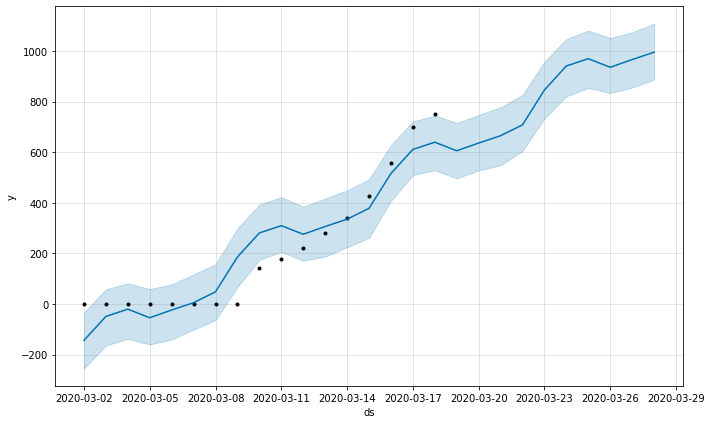

In [33]:
get_prof_preds_for(sm[40:],10)

#### OK looks like we are getting somewhere

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


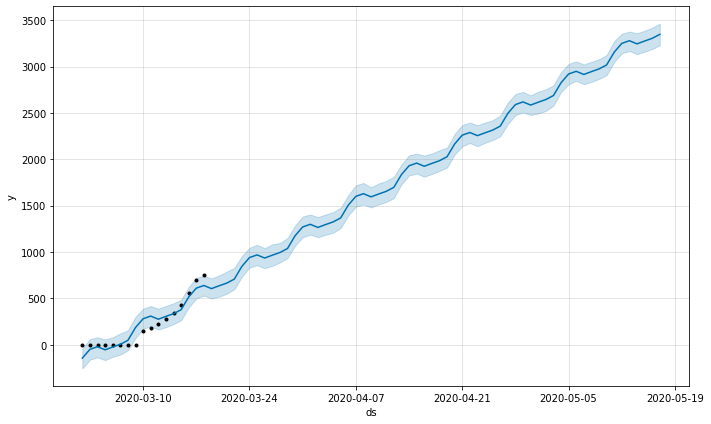

In [35]:
get_prof_preds_for(sm[40:],60)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


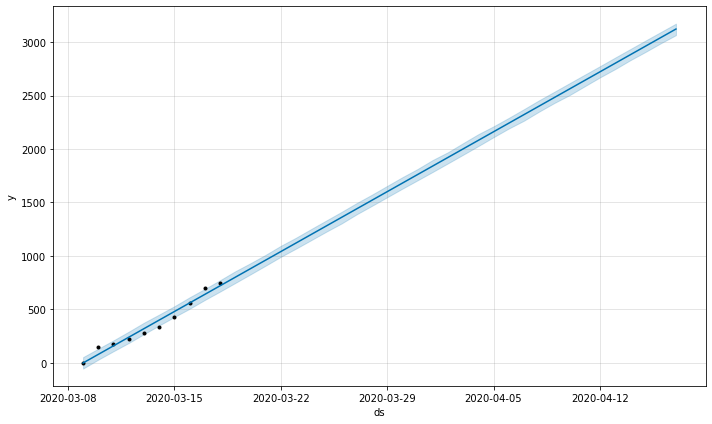

In [39]:
get_prof_preds_for(sm[47:],30]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


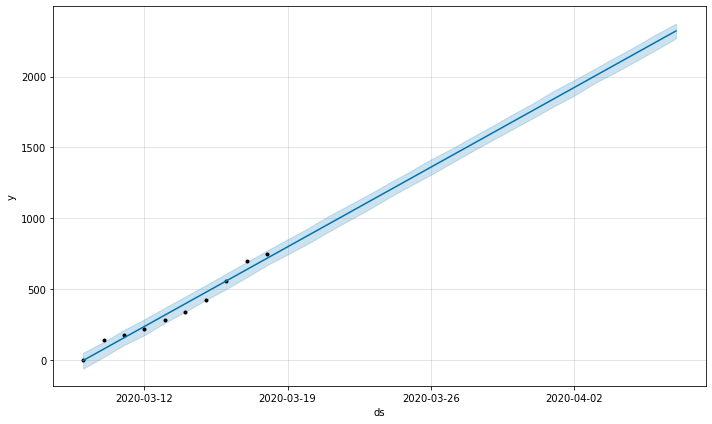

In [44]:
get_prof_preds_for(sm[47:],20)

### STEP 1B: Try with Fatalities 

In [0]:
sm = df[['Date', 'Fatalities']]
sm.columns = ['ds','y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


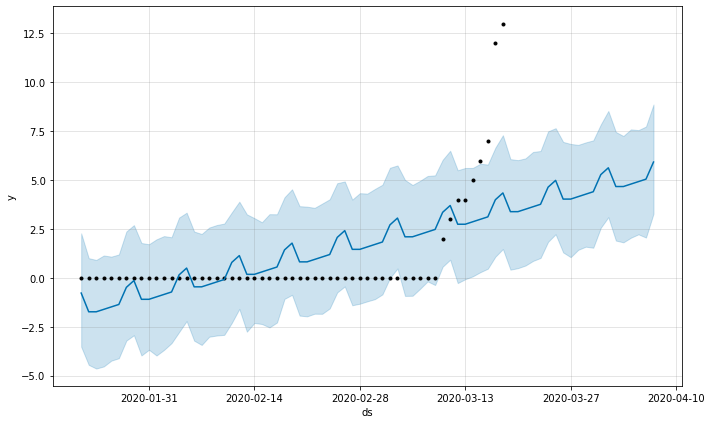

In [46]:
get_prof_preds_for(sm, 20)

In [47]:
sm

ds     y
0   2020-01-22   0.0
1   2020-01-23   0.0
2   2020-01-24   0.0
3   2020-01-25   0.0
4   2020-01-26   0.0
5   2020-01-27   0.0
6   2020-01-28   0.0
7   2020-01-29   0.0
8   2020-01-30   0.0
9   2020-01-31   0.0
10  2020-02-01   0.0
11  2020-02-02   0.0
12  2020-02-03   0.0
13  2020-02-04   0.0
14  2020-02-05   0.0
15  2020-02-06   0.0
16  2020-02-07   0.0
17  2020-02-08   0.0
18  2020-02-09   0.0
19  2020-02-10   0.0
20  2020-02-11   0.0
21  2020-02-12   0.0
22  2020-02-13   0.0
23  2020-02-14   0.0
24  2020-02-15   0.0
25  2020-02-16   0.0
26  2020-02-17   0.0
27  2020-02-18   0.0
28  2020-02-19   0.0
29  2020-02-20   0.0
30  2020-02-21   0.0
31  2020-02-22   0.0
32  2020-02-23   0.0
33  2020-02-24   0.0
34  2020-02-25   0.0
35  2020-02-26   0.0
36  2020-02-27   0.0
37  2020-02-28   0.0
38  2020-02-29   0.0
39  2020-03-01   0.0
40  2020-03-02   0.0
41  2020-03-03   0.0
42  2020-03-04   0.0
43  2020-03-05   0.0
44  2020-03-06   0.0
45  2020-03-07   0.0
46  2020-03-08   0.0
47  2020-03-09   0.0
48  2020-03-10   2.0
49  2020-03-11   3.0
50  2020-03-12   4.0
51  2020-03-13   4.0
52  2020-03-14   5.0
53  2020-03-15   6.0
54  2020-03-16   7.0
55  2020-03-17  12.0
56  2020-03-18  13.0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


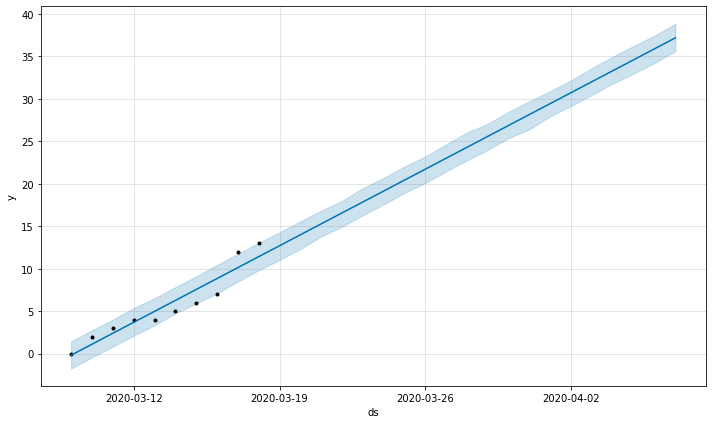

In [48]:
get_prof_preds_for(sm[47:], 20)

# STEP 2: Actually make predictions 
(using the mess we made above for fodder)

In [52]:
df.head()

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
0   1     California             US  ...  2020-01-22             0.0        0.0
1   2     California             US  ...  2020-01-23             0.0        0.0
2   3     California             US  ...  2020-01-24             0.0        0.0
3   4     California             US  ...  2020-01-25             0.0        0.0
4   5     California             US  ...  2020-01-26             0.0        0.0

[5 rows x 8 columns]

In [0]:
cc = df[['Date', 'ConfirmedCases']] # cc = Confirmed Cases
fc = df[['Date', 'Fatalities']] # fc = Fatal Cases

## Make our function return something useful for a big df

In [0]:
def get_prof_preds_for(df, n):
  df.columns = ['ds', 'y']
  m = Prophet()
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  fig1 = m.plot(forecast)
  return forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


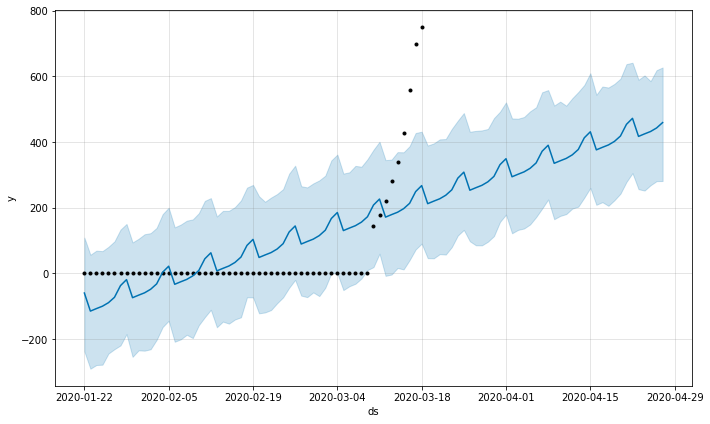

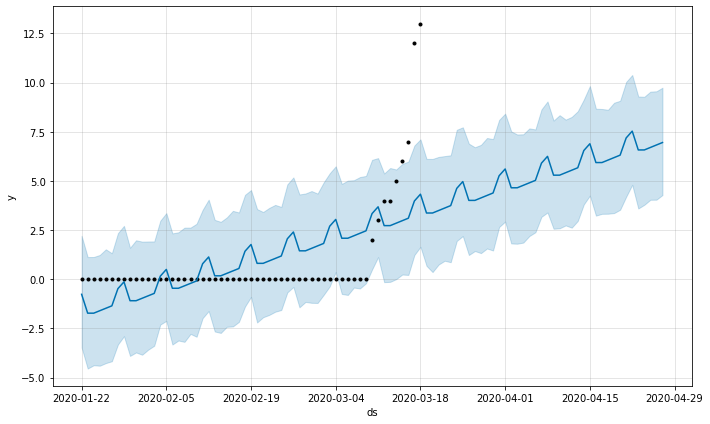

In [63]:
pred_cc_1 = get_prof_preds_for(cc, 40)
pred_fc_1 = get_prof_preds_for(fc, 40)

In [66]:
pred_cc_1.tail()['yhat']

92    416.760552
93    424.406951
94    431.679259
95    442.451519
96    458.847869
Name: yhat, dtype: float64

In [68]:
pred_fc_1.tail()['trend']

92    6.817985
93    6.909611
94    7.001237
95    7.092863
96    7.184489
Name: trend, dtype: float64

In [69]:
pred_fc_1.tail()

ds     trend  ...  multiplicative_terms_upper      yhat
92 2020-04-23  6.817985  ...                         0.0  6.577565
93 2020-04-24  6.909611  ...                         0.0  6.578175
94 2020-04-25  7.001237  ...                         0.0  6.703731
95 2020-04-26  7.092863  ...                         0.0  6.829286
96 2020-04-27  7.184489  ...                         0.0  6.954790

[5 rows x 16 columns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ERROR! Session/line number was not unique in database. History logging moved to new session 60


INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


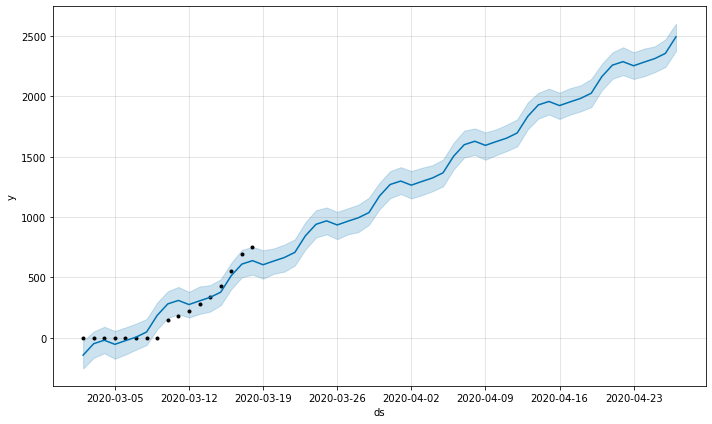

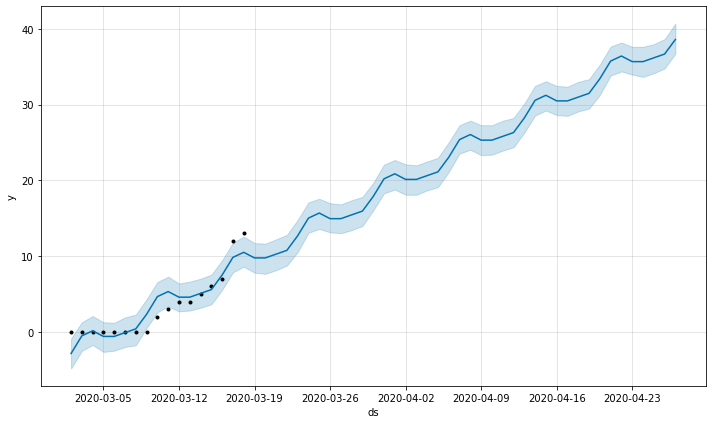

In [71]:
pred_cc_2 = get_prof_preds_for(cc[40:], 40)
pred_fc_2 = get_prof_preds_for(fc[40:], 40)

In [72]:
pred_cc_2.tail()['yhat']

52    2253.842581
53    2284.327597
54    2313.312099
55    2356.301598
56    2493.873881
Name: yhat, dtype: float64

In [73]:
pred_fc_2.tail()['yhat']

52    35.672133
53    35.671640
54    36.171123
55    36.670609
56    38.594187
Name: yhat, dtype: float64

In [75]:
pred_fc_2.tail()

ds      trend  ...  multiplicative_terms_upper       yhat
52 2020-04-23  35.679746  ...                         0.0  35.672133
53 2020-04-24  36.419813  ...                         0.0  35.671640
54 2020-04-25  37.159880  ...                         0.0  36.171123
55 2020-04-26  37.899946  ...                         0.0  36.670609
56 2020-04-27  38.640013  ...                         0.0  38.594187

[5 rows x 16 columns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


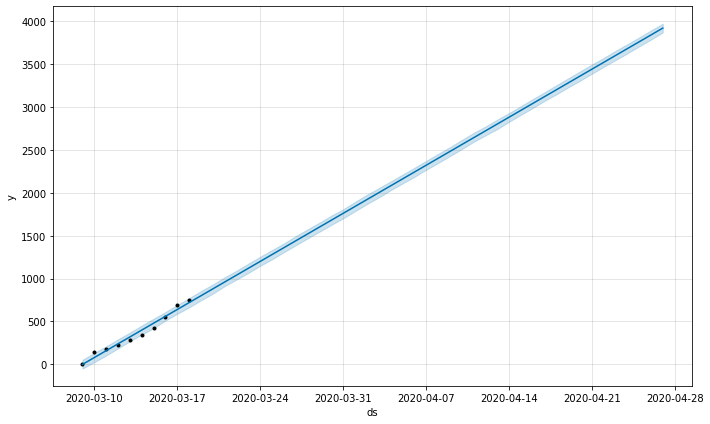

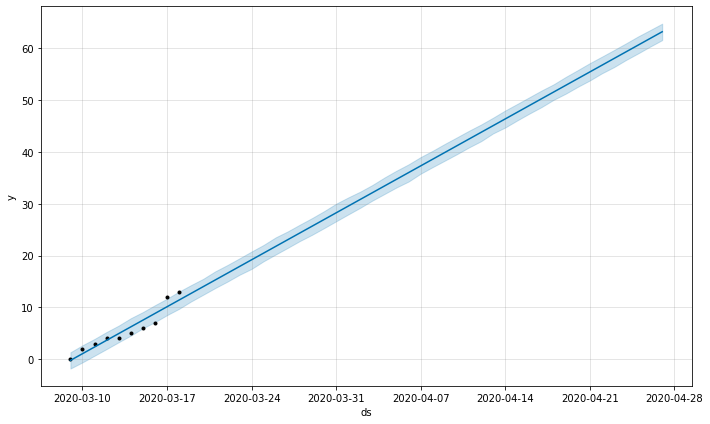

In [76]:
pred_cc_3 = get_prof_preds_for(cc[47:], 40)
pred_fc_3 = get_prof_preds_for(fc[47:], 40)

In [77]:
pred_cc_3.tail()

ds        trend  ...  multiplicative_terms_upper         yhat
45 2020-04-23  3602.096171  ...                         0.0  3602.096171
46 2020-04-24  3682.157404  ...                         0.0  3682.157404
47 2020-04-25  3762.218637  ...                         0.0  3762.218637
48 2020-04-26  3842.279871  ...                         0.0  3842.279871
49 2020-04-27  3922.341104  ...                         0.0  3922.341104

[5 rows x 13 columns]

In [78]:
pred_fc_3.tail()

ds      trend  ...  multiplicative_terms_upper       yhat
45 2020-04-23  58.046600  ...                         0.0  58.046600
46 2020-04-24  59.341655  ...                         0.0  59.341655
47 2020-04-25  60.636711  ...                         0.0  60.636711
48 2020-04-26  61.931766  ...                         0.0  61.931766
49 2020-04-27  63.226822  ...                         0.0  63.226822

[5 rows x 13 columns]

In [0]:
pred_cc_1_sm = pred_cc_1[['ds','yhat']]
pred_cc_2_sm = pred_cc_2[['ds','yhat']]
pred_cc_3_sm = pred_cc_3[['ds','yhat']]

In [0]:
# lol pandas says this way
# pred_cc_1_sm.merge(pred_cc_2_sm, left_on='ds')
# stackoverflow says this way (better)
cc_df = pd.merge(pred_cc_1_sm, pred_cc_2_sm, how='left', on='ds', suffixes=('_v1', '_v2'))
cc_df = pd.merge(cc_df, pred_cc_3_sm, how='left', on='ds')

In [139]:
cc_df.columns = ['ds','yhat_v1', 'yhat_v2', 'yhat_v3']
cc_df

ds     yhat_v1      yhat_v2      yhat_v3
0  2020-01-22  -60.115018          NaN          NaN
1  2020-01-23 -115.172020          NaN          NaN
2  2020-01-24 -107.546040          NaN          NaN
3  2020-01-25 -100.294151          NaN          NaN
4  2020-01-26  -89.542310          NaN          NaN
..        ...         ...          ...          ...
92 2020-04-23  416.760552  2253.842581  3602.096171
93 2020-04-24  424.406951  2284.327597  3682.157404
94 2020-04-25  431.679259  2313.312099  3762.218637
95 2020-04-26  442.451519  2356.301598  3842.279871
96 2020-04-27  458.847869  2493.873881  3922.341104

[97 rows x 4 columns]

In [0]:
pred_fc_1_sm = pred_fc_1[['ds','yhat']]
pred_fc_2_sm = pred_fc_2[['ds','yhat']]
pred_fc_3_sm = pred_fc_3[['ds','yhat']]

fc_df = pd.merge(pred_fc_1_sm, pred_fc_2_sm, how='left', on='ds', suffixes=('_v1', '_v2'))
fc_df = pd.merge(fc_df, pred_fc_3_sm, how='left', on='ds')

In [104]:
fc_df.columns = ['ds','yhat_v1', 'yhat_v2', 'yhat_v3']
fc_df

ds   yhat_v1    yhat_v2    yhat_v3
0  2020-01-22 -0.763535        NaN        NaN
1  2020-01-23 -1.721993        NaN        NaN
2  2020-01-24 -1.722533        NaN        NaN
3  2020-01-25 -1.598128        NaN        NaN
4  2020-01-26 -1.473724        NaN        NaN
..        ...       ...        ...        ...
92 2020-04-23  6.577565  35.672133  58.046600
93 2020-04-24  6.578175  35.671640  59.341655
94 2020-04-25  6.703731  36.171123  60.636711
95 2020-04-26  6.829286  36.670609  61.931766
96 2020-04-27  6.954790  38.594187  63.226822

[97 rows x 4 columns]

In [0]:
import matplotlib.pyplot as plt

ERROR! Session/line number was not unique in database. History logging moved to new session 61


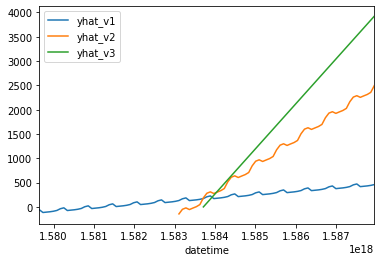

In [118]:
cc_df['datetime'] = pd.to_numeric(cc_df['ds'])
# cc_df = cc_df.set_index('datetime')
cc_df.plot(x="datetime", y=["yhat_v1", "yhat_v2", "yhat_v3"])
plt.show()

In [124]:
cc_df.dtypes

ds          datetime64[ns]
yhat_v1            float64
yhat_v2            float64
yhat_v3            float64
datetime             int64
dtype: object

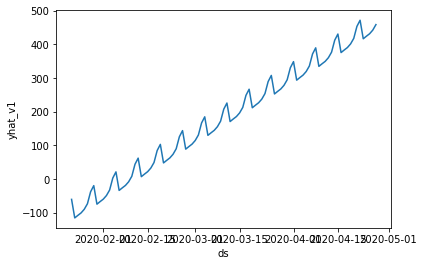

In [133]:
import seaborn as sns
# sns.lineplot()



# ax = sns.lineplot(x="ds", y="yhat_v1", data=cc_df);
ax = sns.lineplot(x="ds", y="yhat_v1", data=cc_df)
            

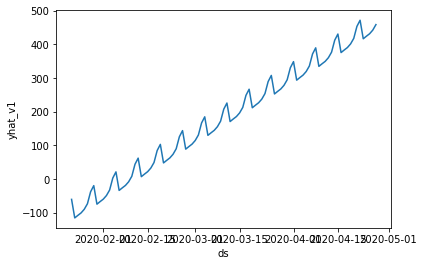

In [129]:
ax = sns.lineplot(x="ds", y="yhat_v1", data=cc_df)

In [0]:
fmri = sns.load_dataset("fmri")

In [135]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [140]:
cc_df

ds     yhat_v1      yhat_v2      yhat_v3
0  2020-01-22  -60.115018          NaN          NaN
1  2020-01-23 -115.172020          NaN          NaN
2  2020-01-24 -107.546040          NaN          NaN
3  2020-01-25 -100.294151          NaN          NaN
4  2020-01-26  -89.542310          NaN          NaN
..        ...         ...          ...          ...
92 2020-04-23  416.760552  2253.842581  3602.096171
93 2020-04-24  424.406951  2284.327597  3682.157404
94 2020-04-25  431.679259  2313.312099  3762.218637
95 2020-04-26  442.451519  2356.301598  3842.279871
96 2020-04-27  458.847869  2493.873881  3922.341104

[97 rows x 4 columns]

In [0]:
cc_df_melt = pd.melt(cc_df, id_vars=['ds'], value_vars=['yhat_v1', 'yhat_v2', 'yhat_v3'])

In [150]:
cc_df_melt

ds variable        value
0   2020-01-22  yhat_v1   -60.115018
1   2020-01-23  yhat_v1  -115.172020
2   2020-01-24  yhat_v1  -107.546040
3   2020-01-25  yhat_v1  -100.294151
4   2020-01-26  yhat_v1   -89.542310
..         ...      ...          ...
286 2020-04-23  yhat_v3  3602.096171
287 2020-04-24  yhat_v3  3682.157404
288 2020-04-25  yhat_v3  3762.218637
289 2020-04-26  yhat_v3  3842.279871
290 2020-04-27  yhat_v3  3922.341104

[291 rows x 3 columns]

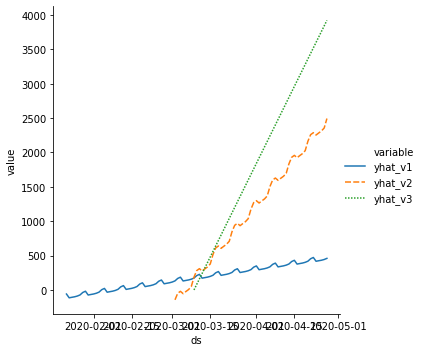

In [151]:
sns.relplot(x="ds", y="value", hue="variable", style="variable",
            kind="line", data=cc_df_melt);